# Histology Tissue Classification Project (HTCP)

(C) K. Mader / U. Michelucci 2018-2019

# Overview
The dataset serves as a much more interesting MNIST or CIFAR10 problem for biologists by focusing on histology tiles from patients with colorectal cancer. In particular, the data has 8 different classes of tissue (but Cancer/Not Cancer can also be an interesting problem).

The dataset has been adapted for the course by K. Mader (kevin.mader@gmail.com), and is available on kaggle: https://goo.gl/26zj41

# Challenge
- Classify tiles correctly into one of the eight classes
- Which classes are most frequently confused?
- What features can be used (like texture, see scikit-image) to improve classification?
- How can these models be applied to the much larger 5000x5000 models? 
How can this be done efficiently?

# Acknowledgements
The dataset has been copied from Zenodo: https://zenodo.org/record/53169#.W6HwwP4zbOQ

made by: Kather, Jakob Nikolas; Zöllner, Frank Gerrit; Bianconi, Francesco; Melchers, 
    Susanne M; Schad, Lothar R; Gaiser, Timo; Marx, Alexander; Weis, Cleo-Aron

The copy here is to make it more accessible to Kaggle users and allow kernels 
providing basic analysis of the data

Content
This data set represents a collection of textures in histological images of 
human colorectal cancer. It contains two files:

    Kather_texture_2016_image_tiles_5000.zip": a zipped folder containing 5000 
    histological images of 150 * 150 px each (74 * 74 µm). Each image belongs 
    to exactly one of eight tissue categories (specified by the folder name). 
    
    Kather_texture_2016_larger_images_10.zip": a zipped folder containing 10 
    larger histological images of 5000 x 5000 px each. These images contain 
    more than one tissue type. Image format

All images are RGB, 0.495 µm per pixel, digitized with an Aperio ScanScope 
(Aperio/Leica biosystems), magnification 20x. Histological samples are fully 
anonymized images of formalin-fixed paraffin-embedded human colorectal 
adenocarcinomas (primary tumors) from our pathology archive (Institute of Pathology, 
University Medical Center Mannheim, Heidelberg University, Mannheim, Germany).

Additionally the files has been prepared to resemble the MNIST dataset, meaning that you will also find the following files

- HTCP_8_8_L - 
- HTCP_8_8_RGB -
- HTCP_28_28_L -
- HTCP_28_28_RGB - 
- HTCP_64_64_L

# Ethics statement
All experiments were approved by the institutional ethics board (medical ethics board II, University Medical Center Mannheim, Heidelberg University, Germany; approval 2015-868R-MA). The institutional ethics board waived the need for informed consent for this retrospective analysis of anonymized samples. All experiments were carried out in accordance with the approved guidelines and with the Declaration of Helsinki.

# More information / data usage
For more information, please refer to the following article. Please cite this article when using the data set.

Kather JN, Weis CA, Bianconi F, Melchers SM, Schad LR, Gaiser T, Marx A, Zollner F: Multi-class texture analysis in colorectal cancer histology (2016), Scientific Reports (in press)

# Contact
For questions, please contact: Dr. Jakob Nikolas Kather http://orcid.org/0000-0002-3730-5348 ResearcherID: D-4279-2015

# Download the data

The dataset is composed of two datasets:

- The small images that will be used to test the classification models
- The big microscope images (5000x5000)

The first dataset is quite small and can be found in the same github repository where you find this file. The second are much bigger (250 Mb and 700 Mb) and cannot be uploaded on github, so you can get them on  kaggle: https://goo.gl/hkRSke  

# Helper Functions

In [1]:
def plot_image(some_image):
    
    some_digit_image = some_image.values.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

In [2]:
def get_label_name(idx):
    
    if (idx == 1):
        return '(1) TUMOR'
    elif (idx == 2):
        return '(2) STROMA'
    elif (idx == 3):
        return '(3) COMPLEX'
    elif (idx == 4):
        return '(4) LYMPHO'
    elif (idx == 5):
        return '(5) DEBRIS'
    elif (idx == 6):
        return '(6) MUCOSA'
    elif (idx == 7):
        return '(7) ADIPOSE'
    elif (idx == 8):
        return '(8) EMPTY'

# Load the data

In [3]:
%matplotlib inline
from glob import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from random import *
import seaborn as sns

In [4]:
data = pd.read_csv('data/HTCP_28_28_L.csv')

Let's create an array with labels (not yet one-encoded) and one for the images.

In [5]:
yinput = data['label']
Xinput = data.drop(['label'], axis = 1)

Let's look at the first records of the dataframe

In [6]:
Xinput.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,101,110,154,160,95,44,139,184,164,160,...,128,103,73,72,75,152,130,96,133,159
1,67,66,69,76,80,57,46,67,90,77,...,57,58,65,74,80,81,83,77,75,73
2,127,137,121,140,170,111,128,117,60,105,...,69,90,100,143,119,148,140,193,146,97
3,80,90,101,106,120,100,99,66,63,91,...,154,131,109,97,102,71,93,120,84,62
4,153,141,121,132,110,131,119,99,101,91,...,134,117,121,136,178,192,210,189,149,155


In [7]:
yinput.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

The datasets has 5000 images, each 28x28 in gray

In [8]:
Xinput.shape

(5000, 784)

In [9]:
yinput.shape

(5000,)

## Examples of each class

Let's plot an image of each class

In [10]:
yinput.unique()

array([2, 5, 7, 6, 8, 1, 4, 3], dtype=int64)

In [11]:
def get_random_element_with_label (Xinput, lbls, lbl):
    tmp = lbls == lbl
    subset = Xinput[tmp]
    return subset.iloc[randint(1,subset.shape[0])]

labels_overview = np.empty([10,784])
for i in range (1,9):
    img = get_random_element_with_label(Xinput, yinput, i)
    labels_overview[i,:] = img

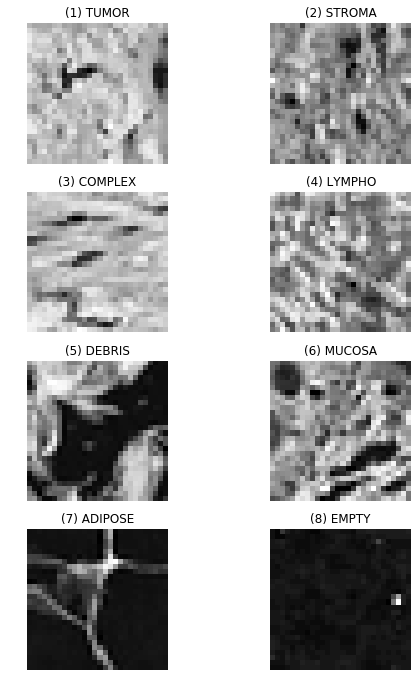

In [12]:
f = plt.figure(figsize=(8,15));
count = 1
for i in range(1,9):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.2)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[i,:].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

In [13]:
total = 0
for i in range(9):
    print ("image", i, "appear", np.count_nonzero(yinput == i), "times")

image 0 appear 0 times
image 1 appear 625 times
image 2 appear 625 times
image 3 appear 625 times
image 4 appear 625 times
image 5 appear 625 times
image 6 appear 625 times
image 7 appear 625 times
image 8 appear 625 times


In [14]:
total = 0
for i in range(9):
    print ("image", i, "makes", np.around(np.count_nonzero(yinput == i)/5000.0*100.0, decimals=1), "% of the 5000 observations")

image 0 makes 0.0 % of the 5000 observations
image 1 makes 12.5 % of the 5000 observations
image 2 makes 12.5 % of the 5000 observations
image 3 makes 12.5 % of the 5000 observations
image 4 makes 12.5 % of the 5000 observations
image 5 makes 12.5 % of the 5000 observations
image 6 makes 12.5 % of the 5000 observations
image 7 makes 12.5 % of the 5000 observations
image 8 makes 12.5 % of the 5000 observations


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ylabels, ylabels_test = train_test_split(Xinput, yinput, test_size=0.2, stratify=yinput, random_state=2018)

In [16]:
train = xtrain.transpose()
labels = ylabels.values.reshape(1, 4000)-1
labels_ = np.zeros((4000, 9))
labels_[np.arange(4000), labels] = 1
labels_ = labels_.transpose()

In [17]:
print(train.shape)
print(labels_.shape)

(784, 4000)
(9, 4000)


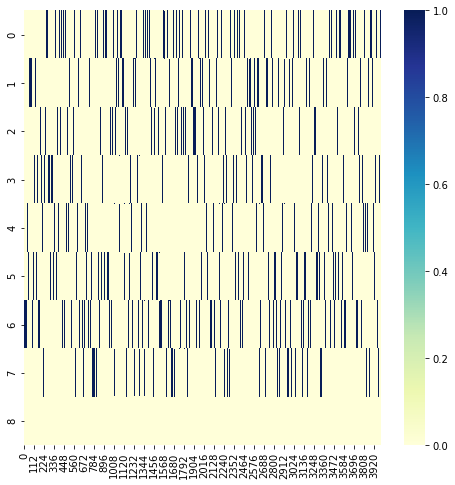

In [18]:
fig = plt.figure(figsize=(8,8))
fig = sns.heatmap(labels_,cmap="YlGnBu")

In [19]:
test = xtest.transpose()
labels_test = ylabels_test.values.reshape(1, 1000)-1
labels_test_ = np.zeros((1000, 9))
labels_test_[np.arange(1000), labels_test] = 1
labels_test_ = labels_test_.transpose()

In [20]:
print(labels_test_.shape)
print(test.shape)

(9, 1000)
(784, 1000)


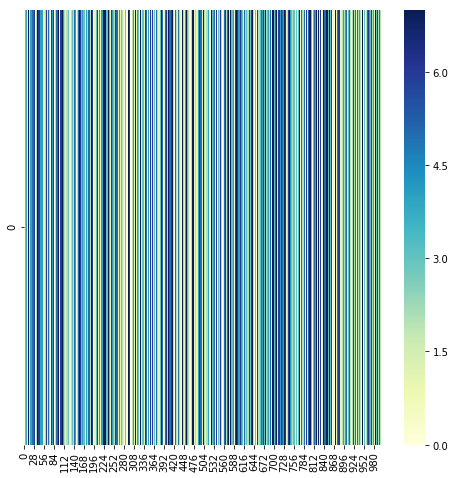

In [21]:
fig = plt.figure(figsize=(8,8))
fig = sns.heatmap(labels_test,cmap="YlGnBu")

## Normalization

In [22]:
train = np.array(train / 255.0)
test = np.array(test / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

In [23]:
import tensorflow as tf

## Model_1

In [24]:
def create_layer (X, n, activation):
    ndim = int(X.shape[0])
    stddev = 2.0 / np.sqrt(ndim)
    initialization = tf.truncated_normal((n, ndim), stddev = stddev)
    W = tf.Variable(initialization)
    b = tf.Variable(tf.zeros([n,1]))
    Z = tf.matmul(W,X)+b
    return activation(Z)

In [25]:
tf.reset_default_graph() 

n_dim = 784
n1 = 294
n2 = 122
n3 = 76
n4 = 266
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
outputs = create_layer (hidden4, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [26]:
def model(minibatch_size, training_epochs, features, classes, logging_step, learning_r):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    return sess, cost_history

Reached epoch 0 cost J = 0.86711717
Reached epoch 10 cost J = 0.85189515
Reached epoch 20 cost J = 0.84645
Reached epoch 30 cost J = 0.8422543
Reached epoch 40 cost J = 0.8388776
Reached epoch 50 cost J = 0.8359488
Reached epoch 60 cost J = 0.833303


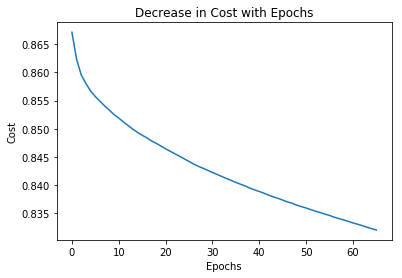

In [27]:
sess, cost_history = model (51, 65, train, labels_,logging_step = 10, learning_r = 0.004496)
plt.plot(cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
plt.show()

In [28]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
pred_y_train = sess.run(y_, feed_dict = {X: train, Y: labels_})
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.00494}, session = sess))

Accuracy: 0.527


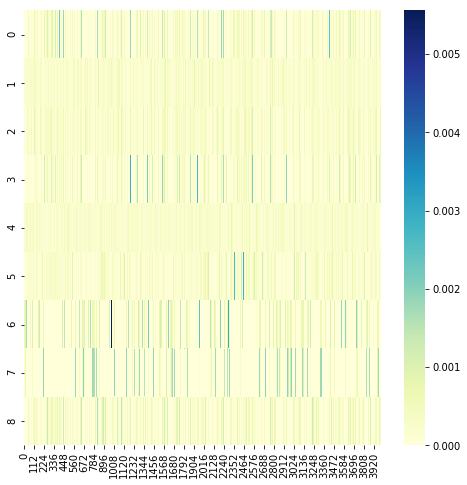

In [29]:
fig = plt.figure(figsize=(8,8))
fig = sns.heatmap(pred_y_train,cmap="YlGnBu")

In [30]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
pred_y_test = sess.run(y_, feed_dict = {X: test, Y: labels_test_})
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.00494}, session = sess))

Accuracy: 0.498


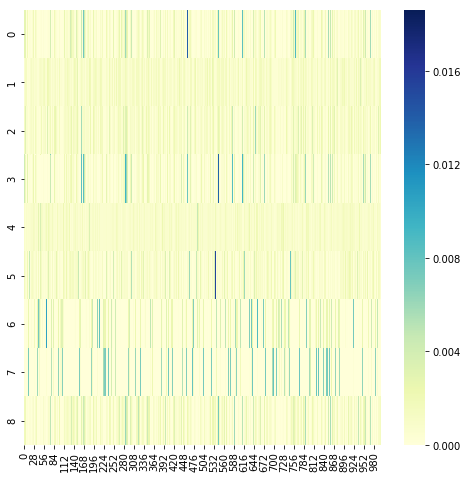

In [31]:
fig = plt.figure(figsize=(8,8))
fig = sns.heatmap(pred_y_test,cmap="YlGnBu")

## Model_2

In [46]:
tf.reset_default_graph() 

n_dim = 784
n1 = 79
n2 = 162
n3 = 250
n4 = 271
n5 = 139
n6 = 167
n7 = 68
n8 = 99
n9 = 254
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
outputs = create_layer (hidden9, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [47]:
def model(minibatch_size, training_epochs, features, classes, logging_step, learning_r):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    return sess, cost_history

Reached epoch 0 cost J = 0.87682945
Reached epoch 10 cost J = 0.84077317
Reached epoch 20 cost J = 0.83136755
Reached epoch 30 cost J = 0.8247562
Reached epoch 40 cost J = 0.81990385


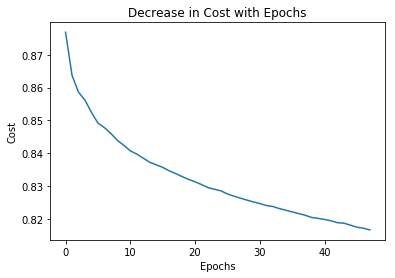

In [48]:
sess, cost_history = model (64,47, train, labels_,logging_step = 10, learning_r = 0.00396)
plt.plot(cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
plt.show()

In [49]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
pred_y_train = sess.run(y_, feed_dict = {X: train, Y: labels_})
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.003995}, session = sess))

Accuracy: 0.5875


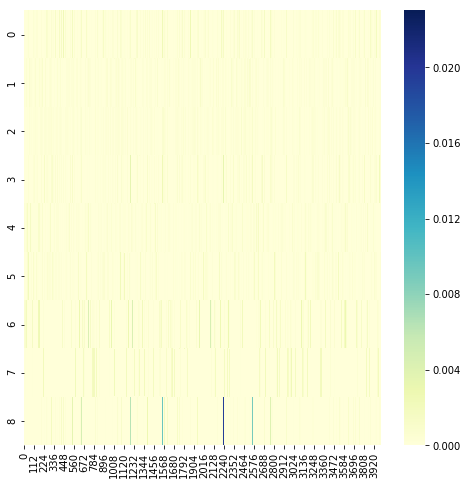

In [50]:
fig = plt.figure(figsize=(8,8))
fig = sns.heatmap(pred_y_train,cmap="YlGnBu")

In [51]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
pred_y_test = sess.run(y_, feed_dict = {X: test, Y: labels_test_})
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.003995}, session = sess))

Accuracy: 0.483


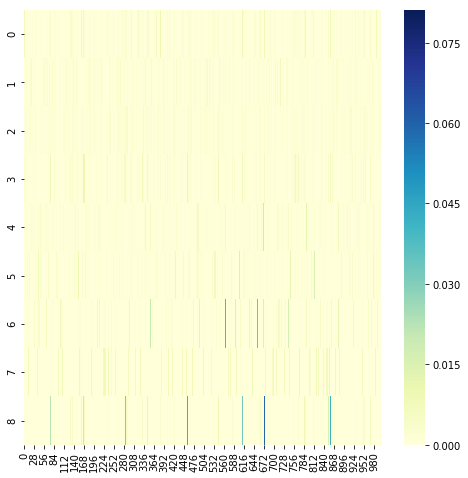

In [52]:
fig = plt.figure(figsize=(8,8))
fig = sns.heatmap(pred_y_test,cmap="YlGnBu")

## Model_3

In [53]:
tf.reset_default_graph() 

n_dim = 784
n1 = 299
n2 = 279
n3 = 144
n4 = 41
n5 = 194
n6 = 214
n7 = 73
n8 = 72
n9 = 241
n10 = 48
n11 = 282
n12 = 285
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
hidden11 = create_layer (hidden10, n11, activation = tf.nn.relu)
hidden12 = create_layer (hidden11, n12, activation = tf.nn.relu)
outputs = create_layer (hidden12, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [54]:
def model(minibatch_size, training_epochs, features, classes, logging_step, learning_r):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    return sess, cost_history

Reached epoch 0 cost J = 0.86434937
Reached epoch 10 cost J = 0.8242119
Reached epoch 20 cost J = 0.81331927
Reached epoch 30 cost J = 0.80682033
Reached epoch 40 cost J = 0.80273604
Reached epoch 50 cost J = 0.79954165
Reached epoch 60 cost J = 0.79708606


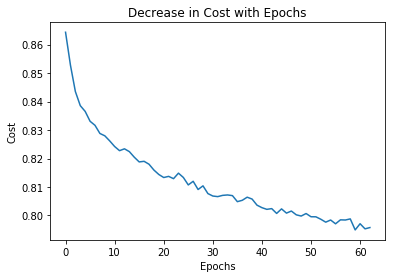

In [55]:
sess, cost_history = model (70,62, train, labels_,logging_step = 10, learning_r = 0.005105)
plt.plot(cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
plt.show()

In [56]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
pred_y_train = sess.run(y_, feed_dict = {X: train, Y: labels_})
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.00311}, session = sess))

Accuracy: 0.6555


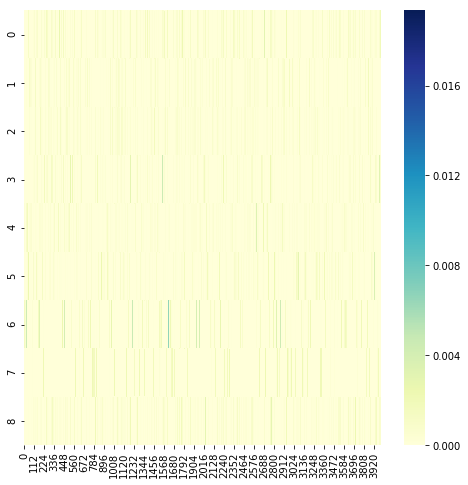

In [57]:
fig = plt.figure(figsize=(8,8))
fig = sns.heatmap(pred_y_train,cmap="YlGnBu")

In [58]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
pred_y_test = sess.run(y_, feed_dict = {X: test, Y: labels_test_})
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.00311}, session = sess))

Accuracy: 0.52


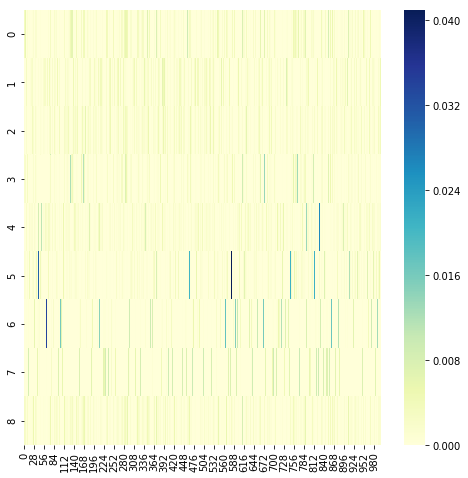

In [59]:
fig = plt.figure(figsize=(8,8))
fig = sns.heatmap(pred_y_test,cmap="YlGnBu")